In [7]:
#importing necessary library
import pandas as pd

In [8]:
#loading the dataset
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
#to see the shape of our dataset
data.shape

(1338, 7)

In [10]:
#to see the description of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# checking the whole information such as datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
# checking for nulls
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# seems there is no null values lets move further
#there is some object type columns in our dataset lets deal with it
# lets visualize our data
# for that we are importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

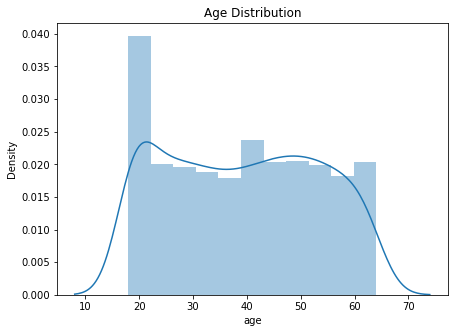

In [14]:
# we are going to plot for age 
plt.figure(figsize=(7,5))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

male      676
female    662
Name: sex, dtype: int64


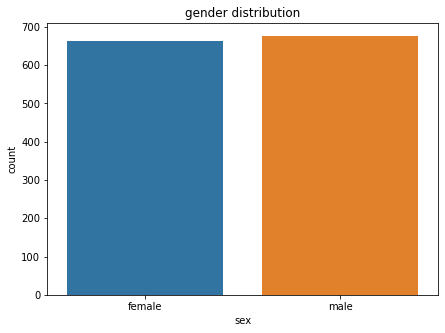

In [16]:
# now we will do it for gender column
plt.figure(figsize=(7,5))
sns.countplot(x='sex',data=data)
plt.title('gender distribution')
print(data["sex"].value_counts())
plt.show()

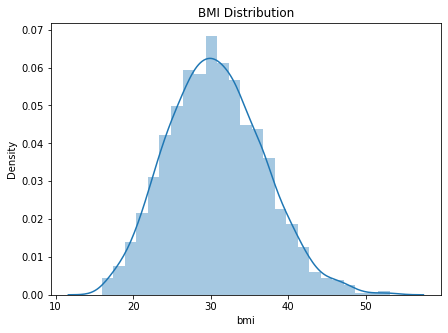

In [17]:
# distribution of bmi column

plt.figure(figsize=(7,5))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

In [18]:
# by looking at above graph we observe that most of the people are overweight
# as the normal Bmi range is between 18.5 to 24.9 so it affects the insurance cost


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


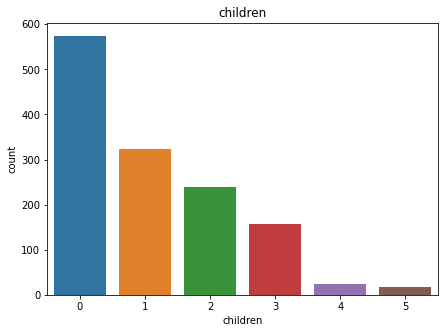

In [22]:
#distribution of children column

plt.figure(figsize=(7,5))
sns.countplot(x='children',data=data)
plt.title('children')
print(data["children"].value_counts())
plt.show()

no     1064
yes     274
Name: smoker, dtype: int64


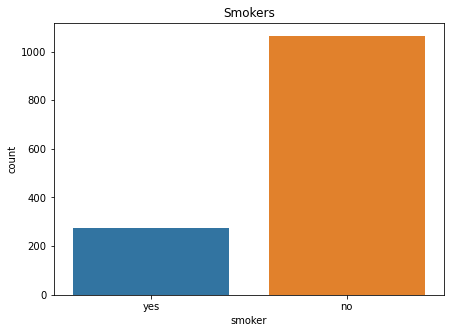

In [23]:
#distribution of smoker column

plt.figure(figsize=(7,5))
sns.countplot(x='smoker',data=data)
plt.title('Smokers')
print(data["smoker"].value_counts())
plt.show()

male      676
female    662
Name: sex, dtype: int64


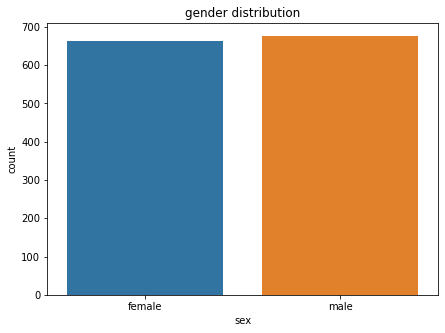

In [21]:
# now we will do it for gender column
plt.figure(figsize=(7,5))
sns.countplot(x='sex',data=data)
plt.title('gender distribution')
print(data["sex"].value_counts())
plt.show()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


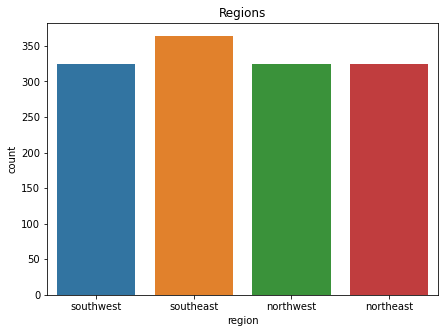

In [24]:
# distribution of region column
plt.figure(figsize=(7,5))
sns.countplot(x='region',data=data)
plt.title('Regions')
print(data["region"].value_counts())
plt.show()

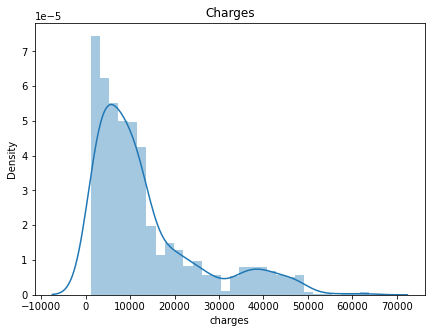

In [25]:
# distribution of charges

plt.figure(figsize=(7,5))
sns.distplot(data['charges'])
plt.title('Charges')
plt.show()

In [26]:
# as we observed that our dataset has three categorical columns 
# so we deal with it by changing them into numerical column
import numpy as np

In [28]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)
data.replace({'smoker':{'yes':1,'no':0}},inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [32]:
# lets observe the relationship between independent and dependent variables

In [34]:
# for that we will divide the dataset into features and label
x=data.drop(columns=['charges'])
y=data['charges']

In [36]:
#first we will divide the dataset into train and test
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
#model initialisation
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [45]:
#lets check the training score
train_accuracy=regression.score(x_train,y_train)
train_accuracy

0.7568635206035598

In [46]:
#lets check the testing score
test_accuracy=regression.score(x_test,y_test)
test_accuracy

0.7281179275779281

In [43]:
# cross validation of model
from sklearn.model_selection import cross_val_score

In [48]:
for i in range(2,10):
    cv_score=cross_val_score(regression,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"at cross fold{i}the cv score is{cv_mean}and accuracy score for training is{train_accuracy}and accuracy score for testing is{test_accuracy}")
    
    print("\n")

at cross fold2the cv score is0.7483588573513897and accuracy score for training is0.7568635206035598and accuracy score for testing is0.7281179275779281


at cross fold3the cv score is0.7452768919839322and accuracy score for training is0.7568635206035598and accuracy score for testing is0.7281179275779281


at cross fold4the cv score is0.7462138182274611and accuracy score for training is0.7568635206035598and accuracy score for testing is0.7281179275779281


at cross fold5the cv score is0.7470257759641311and accuracy score for training is0.7568635206035598and accuracy score for testing is0.7281179275779281


at cross fold6the cv score is0.7464551628079449and accuracy score for training is0.7568635206035598and accuracy score for testing is0.7281179275779281


at cross fold7the cv score is0.74523102555089and accuracy score for training is0.7568635206035598and accuracy score for testing is0.7281179275779281


at cross fold8the cv score is0.7430361658060368and accuracy score for training is0.7

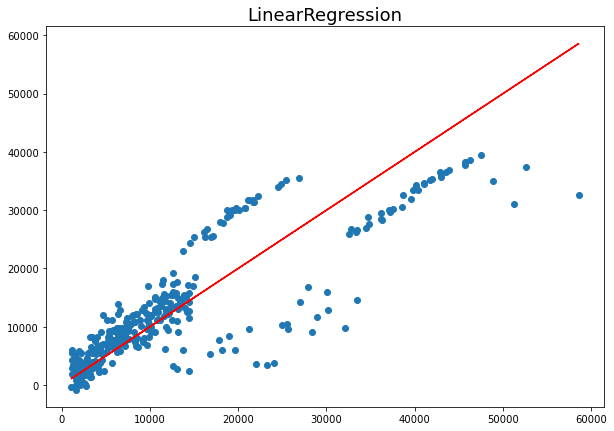

In [56]:
#since no. of folds dont have much impact on accuracy so we take cv=5
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_predict)
plt.plot(y_test,y_test,color='r')
plt.title('LinearRegression',fontsize=18)
plt.show()

In [55]:
y_predict=regression.predict(x_test)

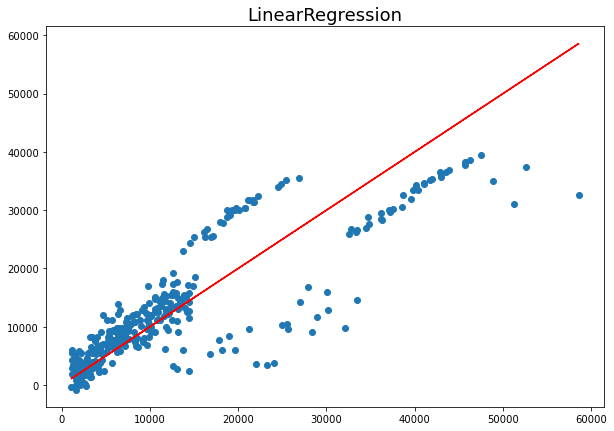

In [57]:
#since no. of folds dont have much impact on accuracy so we take cv=5
plt.figure(figsize=(10,7))
plt.scatter(y_test,y_predict)
plt.plot(y_test,y_test,color='r')
plt.title('LinearRegression',fontsize=18)
plt.show()

In [64]:
# best fit line covering datapoints 

In [65]:
#regularization technique

In [66]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import Lasso

In [67]:
parameters={'alpha':[.0001,.001,.01,.1,1],
           'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [68]:
#final model training

In [69]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)

Lasso(alpha=1, random_state=0)

In [72]:
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

75.68634343055693

In [73]:
pred_ls=ls.predict(x_test)

In [77]:
lss=r2_score(y_test,pred_ls)
lss

0.7281061933307552

In [75]:
from sklearn.metrics import r2_score

In [78]:
# now we are trying with another model
from sklearn.ensemble import RandomForestRegressor

In [83]:
parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [84]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('r2 score',rfs*100)

r2 score 83.5877268213214


In [86]:
rf_score=cross_val_score(rf,x,y,cv=5)
rfc=rf_score.mean()
print('cross_val_score:',rfc*100)

cross_val_score: 84.1333093840611


In [87]:
# we are getting good model accuracy and cross validation score for random forest classifier 
#that means this model works good for this dataset